In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        # dict = pickle.load(fo, encoding='bytes')
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [16]:
batches_meta = unpickle("cifar-10-batches-py/batches.meta")
label_names = batches_meta['label_names']
d = unpickle("cifar-10-batches-py/data_batch_1")
data = d["data"]
labels = np.array(d["labels"])
nsamples = len(data)

In [17]:
batches_meta

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [4]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
data

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ..., 
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [6]:
labels

array([6, 9, 9, ..., 1, 1, 5])

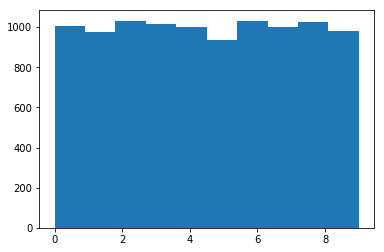

In [15]:
plt.hist(labels)
plt.show()

In [7]:
nsamples

10000

airplane


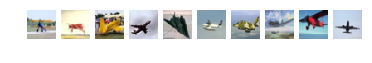

automobile


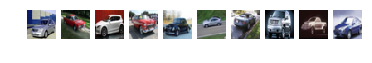

bird


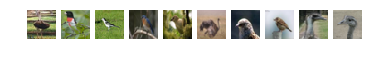

cat


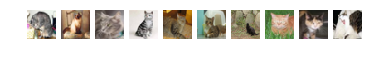

deer


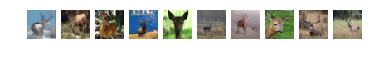

dog


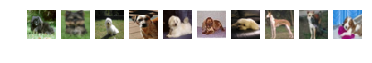

frog


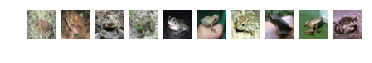

horse


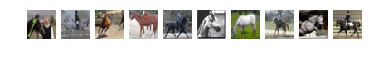

ship


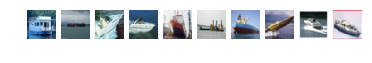

truck


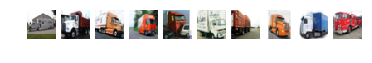

In [8]:
# 各クラスの画像をランダムに10枚抽出して描画
for i in range(10):
    # クラスiの画像のインデックスリストを取得
    targets = np.where(labels == i)[0]
    np.random.shuffle(targets)
    pos = 1
    # 最初の10枚の画像を描画
    for idx in targets[:10]:
        plt.subplot(1, 10, pos)
        img = data[idx]
        # (channel, row, column) => (row, column, channel)
        plt.imshow(img.reshape(3, 32, 32).transpose(1, 2, 0))
        plt.axis('off')
        label = label_names[i]
        pos += 1
    print(label_names[i])
    plt.show()

In [9]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [10]:
n_batches = 5
cifar10_dataset_folder_path = 'cifar-10-batches-py'

# for batch_i in range(1, n_batches + 1)
# features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
features, labels = load_cfar10_batch(cifar10_dataset_folder_path, 1)

In [11]:
def getbatch(features, labels, batch_size=16):
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

In [13]:
getbatch(features, labels)

<generator object batch_features_labels at 0x7efbcd6d2f10>